# Real Estate Price Prediction Project AND Website for Prediction 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df=df.drop(['society','balcony', 'availability'],axis=1)
df.sample(5)

,area_type,location,size,total_sqft,bath,price
12533,Built-up Area,Choodasandra,2 BHK,1065,2.0,46.00
10044,Super built-up Area,Sarjapur,2 BHK,1175,2.0,41.68
1575,Plot Area,Kogilu,7 Bedroom,925,7.0,88.00
3571,Super built-up Area,Kaggadasapura,2 BHK,1200,2.0,53.00
10185,Built-up Area,Sarjapur,3 BHK,1575,3.0,55.00


In [10]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [11]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df.shape

(13320, 6)

In [13]:
df_=df.copy()

In [14]:
df_=df_.dropna()
df_.shape

(13246, 6)

In [15]:
df_.sample(5)

,area_type,location,size,total_sqft,bath,price
5478,Super built-up Area,Electronic City,2 BHK,1020,2.0,29.46
6500,Built-up Area,Vasantha Vallabha Nagar,2 BHK,900,1.0,44.00
11798,Super built-up Area,Electronics City Phase 1,2 BHK,1032,2.0,31.99
3792,Built-up Area,Hebbal,2 BHK,1420,2.0,107.00
1691,Super built-up Area,Doddanekundi,3 BHK,1760,3.0,176.00


In [16]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(2), object(4)
memory usage: 724.4+ KB


In [17]:
df_['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:

df_['BHK']=df_['size'].apply(lambda x:int(x.split(' ')[0]))
df_.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df_=df_.drop(columns=['size'],axis=1)
df_.sample(8)

,area_type,location,total_sqft,bath,price,BHK
10076,Plot Area,Banjara Layout,2500,4.0,140.0,3
10097,Super built-up Area,Electronics City Phase 1,1300,2.0,67.0,2
3782,Super built-up Area,Subramanyapura,1330,3.0,72.0,3
4661,Super built-up Area,Kadugodi,4000,7.0,130.0,7
9967,Super built-up Area,Akshaya Nagar,1100,2.0,48.0,2
6916,Super built-up Area,Padmanabhanagar,1000,1.0,90.0,2
1202,Built-up Area,Kanakpura Road,2689,6.0,220.0,4
3940,Super built-up Area,Kasturi Nagar,1896,3.0,125.0,4


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(-2000.0, 0, '(4, Super built-up  Area, Hosakerehalli, 3205, 5.0, 500.0)'),
  Text(0.0, 0, '(1, Super built-up  Area, Chandapura, 645, 1.0, 16.45)'),
  Text(2000.0, 0, '(2, Super built-up  Area, Electronic City Phase II, 545, 1.0, 27.0)'),
  Text(4000.0, 0, '(2, Super built-up  Area, Sonnenahalli, 1011, 2.0, 50.53)'),
  Text(6000.0, 0, '(3, Super built-up  Area, Jigani, 1245, 3.0, 66.0)'),
  Text(8000.0, 0, '(3, Super built-up  Area, EPIP Zone, 2330, 3.0, 162.0)'),
  Text(10000.0, 0, '(3, Built-up  Area, 3rd Block HBR Layout, 2000, 3.0, 100.0)'),
  Text(12000.0, 0, '(6, Plot  Area, Kadugondanahalli, 727, 6.0, 66.0)'),
  Text(14000.0, 0, '')])

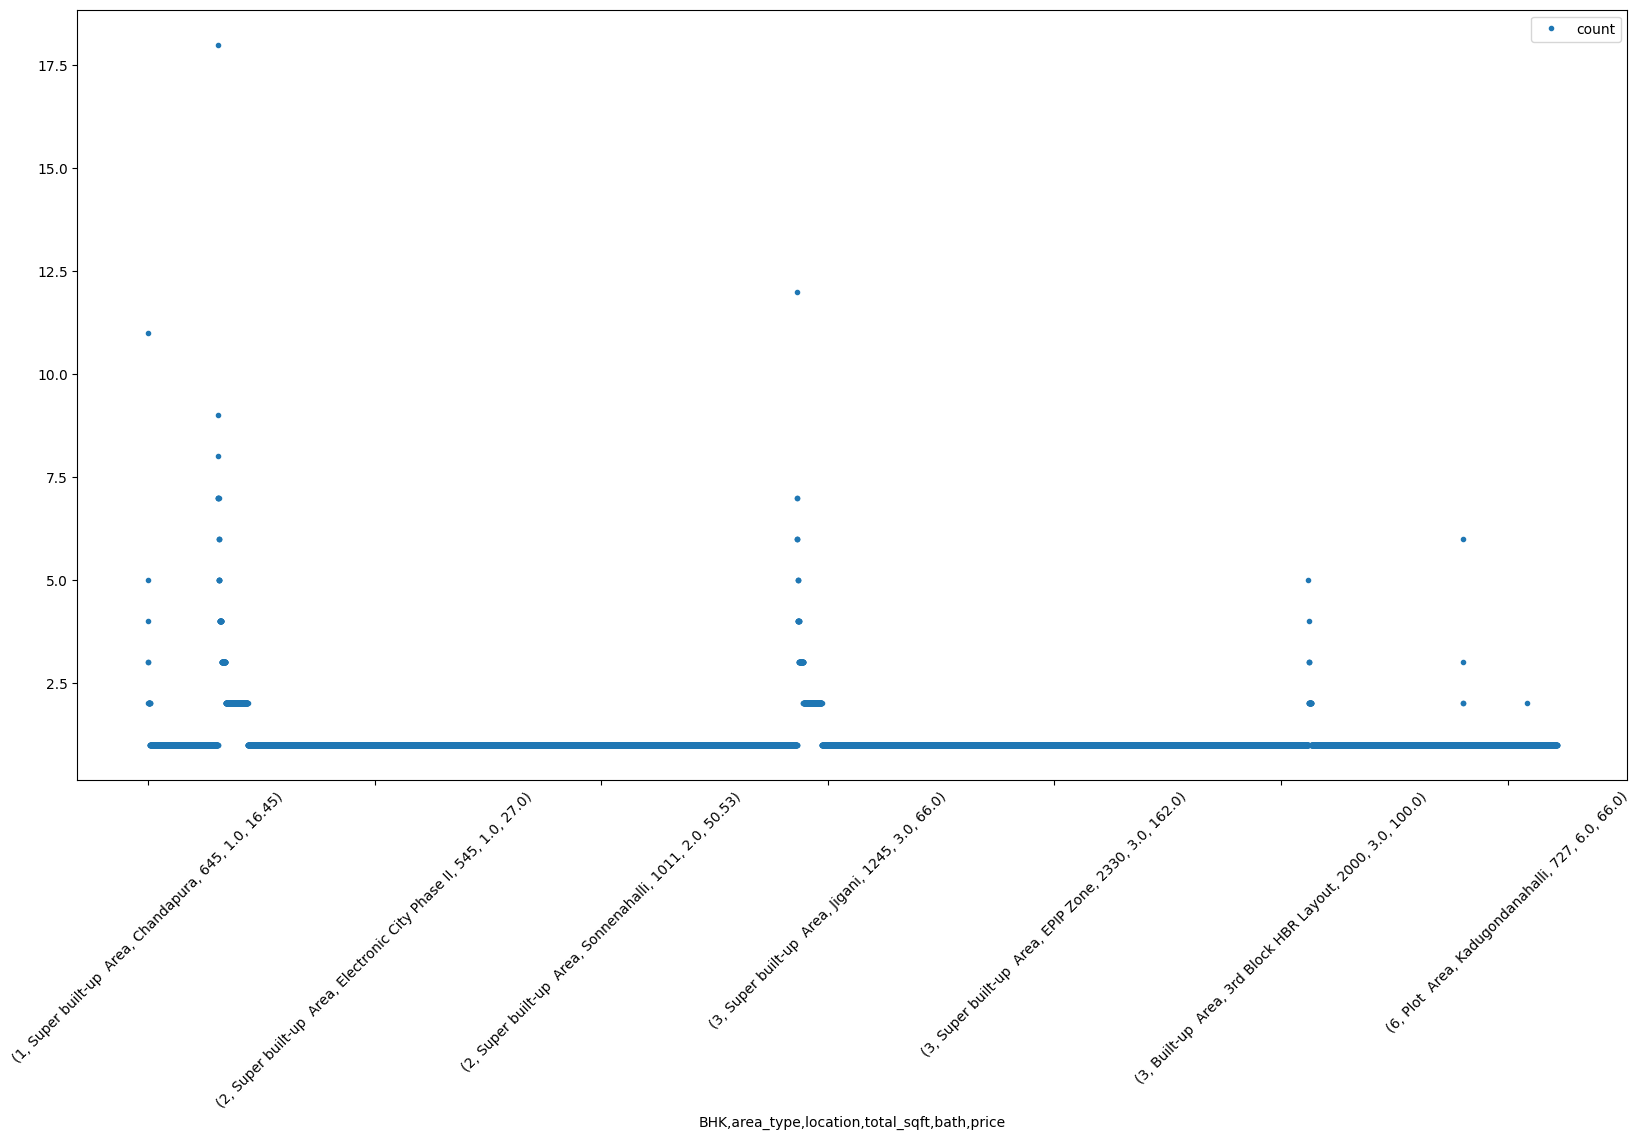

In [20]:
hh=pd.DataFrame(df_.groupby('BHK').value_counts())
hh.plot(style='.')
plt.xticks(rotation=45)

In [21]:
df_.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df_i_=df_.copy()

In [24]:
df_i_=df_i_[~df_i_['total_sqft'].apply(is_float)]
df_i_.shape

(190, 6)

In [25]:
df_.shape

(13246, 6)

In [26]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df_.sample(3)

,area_type,location,total_sqft,bath,price,BHK
4648,Super built-up Area,Jalahalli,1932,4.0,135.0,3
12535,Super built-up Area,Rachenahalli,1550,3.0,68.5,3
543,Super built-up Area,Electronic City,1599,3.0,99.0,3


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple.

In [28]:
df_.total_sqft=df_.total_sqft.apply(convert_sqft_to_num)
df_.head(5)

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [29]:
df_=df_[df_.total_sqft.notnull()]
print(df_.sample(4))
print(df_.shape)

                  area_type         location  total_sqft  bath  price  BHK
4704   Super built-up  Area  Electronic City      1105.0   2.0  35.00    3
1980             Plot  Area   Jalahalli East       800.0   2.0  80.00    3
1515   Super built-up  Area     Malleshpalya      1225.0   2.0  46.86    2
13080  Super built-up  Area     Billekahalli      1290.0   3.0  62.00    3
(13200, 6)


In [30]:
df_.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [31]:
# mean=df_.total_sqft.mean()

In [32]:
#df_.total_sqft.fillna(value=mean,inplace=True)
print(df_.isnull().sum())
print(df_.shape)
print(df.shape)

area_type     0
location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64
(13200, 6)
(13320, 6)


In [33]:
df.price.dtype

dtype('float64')

# Feature Engineering


#### Add new feature called price per square feet



In [34]:
# price is in lakh in ruppe...
df_['price_per_sqft']=df_['price']*100000/df_.total_sqft
df_.sample(5)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
8973,Built-up Area,Hennur,1640.0,3.0,120.00,3,7317.073171
13311,Plot Area,Ramamurthy Nagar,1500.0,9.0,250.00,7,16666.666667
5847,Super built-up Area,Vidyaranyapura,4700.0,10.0,130.00,9,2765.957447
11823,Super built-up Area,Poorna Pragna Layout,1270.0,2.0,50.79,3,3999.212598
3527,Plot Area,Banashankari Stage III,1200.0,7.0,350.00,8,29166.666667


In [35]:
df_.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [36]:
len(df_.location.unique()) 
# no encoding on this location columns by OneHotEncoding or StandardScaller...

1298

In [37]:
# Other Encoding for large no. of the unique entries in the columns...

# .strip()
The strip() method removes any leading, and trailing whitespaces.
Leading means at the beginning of the string, trailing means at the end.
You can specify which character(s) to remove, if not, any whitespaces will be removed.
## For Example:
txt = ",,,,,rrttgg.....banana....rrr"

x = txt.strip(",.grt")

print(x)
output: banana

In [38]:
df_.location=df_.location.apply(lambda x:x.strip())
location_stats=df_.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64


### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [39]:
print('less then 10: ',len(location_stats[location_stats<=10]))
print('More then 10: ',len(location_stats[location_stats>10]))

less then 10:  1047
More then 10:  240


In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10, len(location_stats_less_than_10)

(location
 Sadashiva Nagar          10
 Naganathapura            10
 Basapura                 10
 Nagadevanahalli          10
 Kalkere                  10
                          ..
 1 Giri Nagar              1
 Kanakapura Road,          1
 Kanakapura main  Road     1
 Kannur                    1
 whitefiled                1
 Name: location, Length: 1047, dtype: int64,
 1047)

In [41]:
df_.location=df_.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print(df_.sample(10))
print('\n***length of location unique*** = ',len(df_.location.unique()))

                  area_type          location  total_sqft  bath   price  BHK  \
4993   Super built-up  Area      Bommanahalli      1850.0   3.0   90.00    3   
10219  Super built-up  Area            Jakkur      1290.0   2.0   80.04    2   
9202             Plot  Area        Hosur Road      3000.0   4.0  160.00    4   
10199  Super built-up  Area      Kalyan nagar      2285.0   4.0  165.00    3   
11741  Super built-up  Area        R.T. Nagar      1080.0   2.0   48.00    2   
9612   Super built-up  Area  Old Airport Road      3496.0   4.0  262.00    4   
8071             Plot  Area             other      1000.0   4.0   90.00    5   
5727   Super built-up  Area    Kanakpura Road      1498.0   3.0   95.00    3   
1907         Built-up  Area            Domlur       640.0   1.0   55.00    1   
1658   Super built-up  Area      Rachenahalli      1530.0   2.0   74.39    3   

       price_per_sqft  
4993      4864.864865  
10219     6204.651163  
9202      5333.333333  
10199     7221.006565  

# Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [42]:
df_.sample(5)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
8211,Super built-up Area,Devanahalli,1466.0,3.0,77.59,3,5292.633015
12011,Built-up Area,9th Phase JP Nagar,800.0,8.0,140.00,8,17500.000000
10134,Super built-up Area,other,1270.0,2.0,57.15,3,4500.000000
5393,Super built-up Area,other,42000.0,8.0,175.00,9,416.666667
10915,Built-up Area,5th Phase JP Nagar,1190.0,2.0,61.80,2,5193.277311


In [43]:
df_.price_per_sqft=df_.price_per_sqft.apply(lambda x: float(round(x,2)))
df_.sample(2)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
3870,Plot Area,Whitefield,3000.0,4.0,330.0,4,11000.00
12397,Built-up Area,Raja Rajeshwari Nagar,1400.0,2.0,86.0,3,6142.86


In [44]:
df_[df_['total_sqft']/df_['BHK']<300].head(2)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.51
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.33


In [45]:
# Remove these OutLier from the data Set..
df_=df_[~(df_.total_sqft/df_.BHK < 300)]
df_.head(5)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.00


In [46]:
df_.shape

(12456, 7)

### Outlier Removal Using Standard Deviation and Mean


In [47]:
df_.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

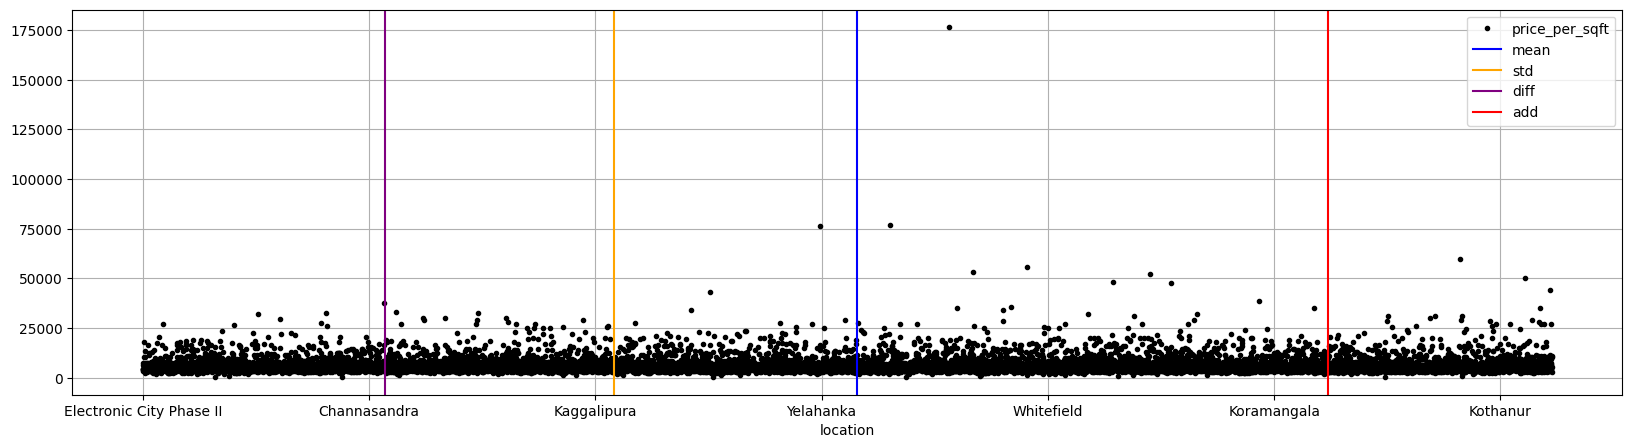

In [48]:
df_try=df_[['price_per_sqft','location']]
df_try.plot(x='location',y='price_per_sqft',style='.',color='black',grid=True,figsize=(20,5))
plt.axvline(df_try.price_per_sqft.mean(),color='blue')
plt.axvline(df_try.price_per_sqft.std(),color='orange')
diff=df_try.price_per_sqft.mean()-df_try.price_per_sqft.std()
add=df_try.price_per_sqft.mean()+df_try.price_per_sqft.std()
plt.axvline(diff,color='purple')
plt.axvline(add,color='red')

plt.legend(['price_per_sqft','mean','std','diff','add'])

plt.show()

Here we find that min price per sqft is 267.830000 rs/sqft whereas max is 176470.590000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [49]:
print(len(df_.location.unique()))
print(df_try.shape)
print(len(df_try.location.unique()))
print('Means : \n',df_try.groupby('location').agg('mean'))
print('\n********************************************************')
print('\nSTD : \n',df_try.groupby('location').agg('std'))

241
(12456, 2)
241
Means : 
                            price_per_sqft
location                                 
1st Block Jayanagar          12359.253000
1st Phase JP Nagar            9726.405652
2nd Phase Judicial Layout     4048.701818
2nd Stage Nagarbhavi         14381.275556
5th Block Hbr Layout          6622.120000
...                                   ...
Yelahanka                     5204.894634
Yelahanka New Town            5860.659474
Yelenahalli                   4012.550769
Yeshwanthpur                  6620.544250
other                         7477.935553

[241 rows x 1 columns]

********************************************************

STD : 
                            price_per_sqft
location                                 
1st Block Jayanagar           3931.939541
1st Phase JP Nagar            4802.127032
2nd Phase Judicial Layout      674.731266
2nd Stage Nagarbhavi          5272.435483
5th Block Hbr Layout          4675.409036
...                                   ..

In [50]:
def remove_price_per_sqft_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.mean(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>=diff) & (subdf.price_per_sqft<=add)]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out   

In [51]:
df_=remove_price_per_sqft_outliers(df_)
df_.shape

(11294, 7)

In [52]:
df_.head(3)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,60.0,2,6000.00
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,115.0,3,6534.09
2,Super built-up Area,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.56


#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like



In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    


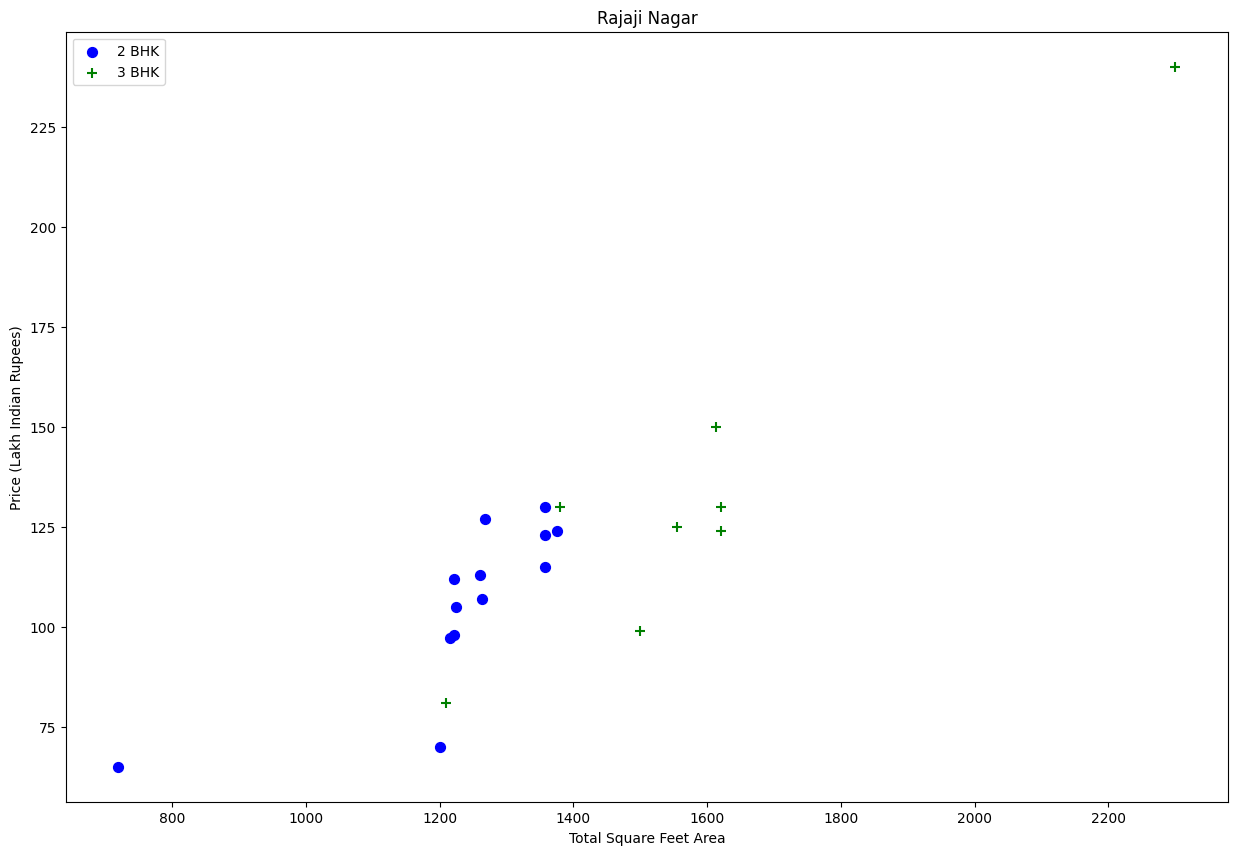

In [54]:
plot_scatter_chart(df_,"Rajaji Nagar")

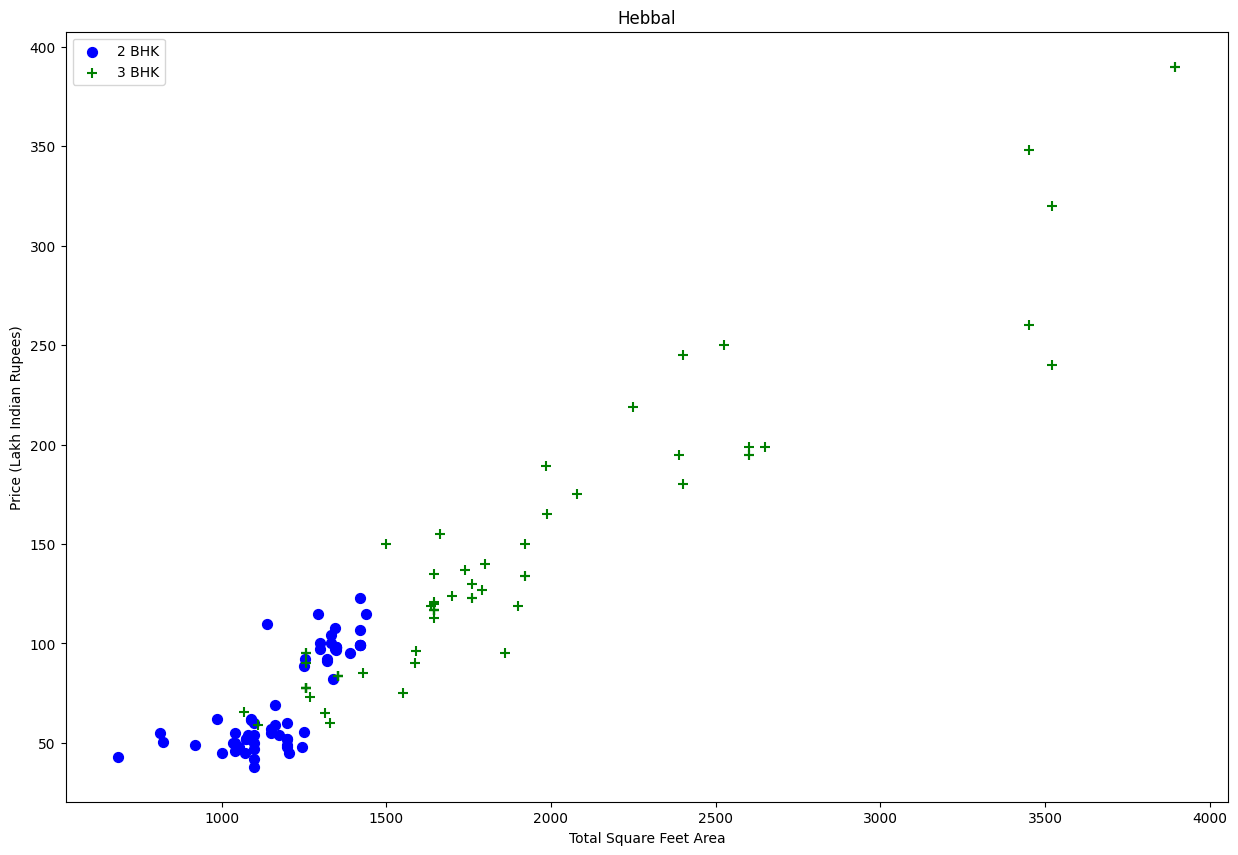

In [55]:
plot_scatter_chart(df_,"Hebbal")


In [56]:
len(df_.location.unique())

240

In [57]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [58]:
df_ = remove_bhk_outliers(df_)
df_.shape

(8087, 7)

### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties



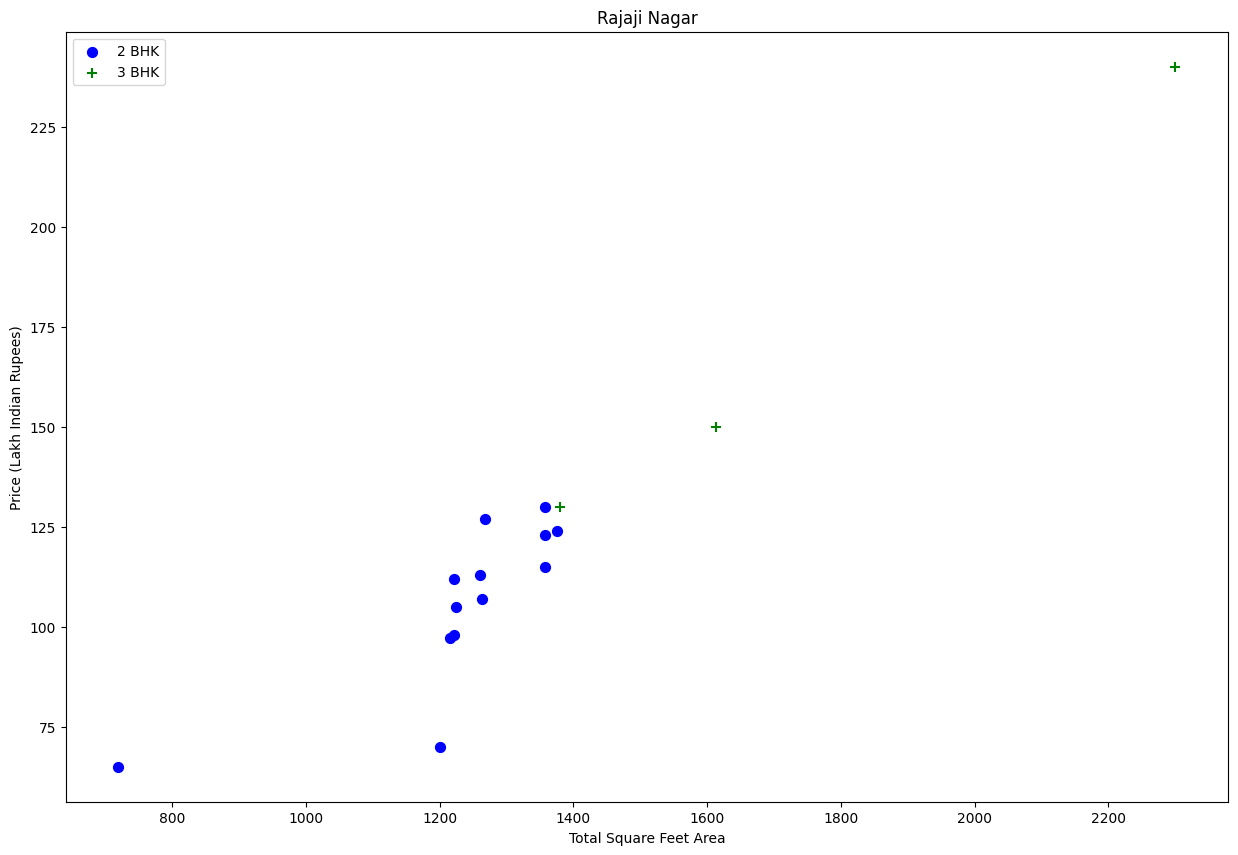

In [59]:
plot_scatter_chart(df_,"Rajaji Nagar")

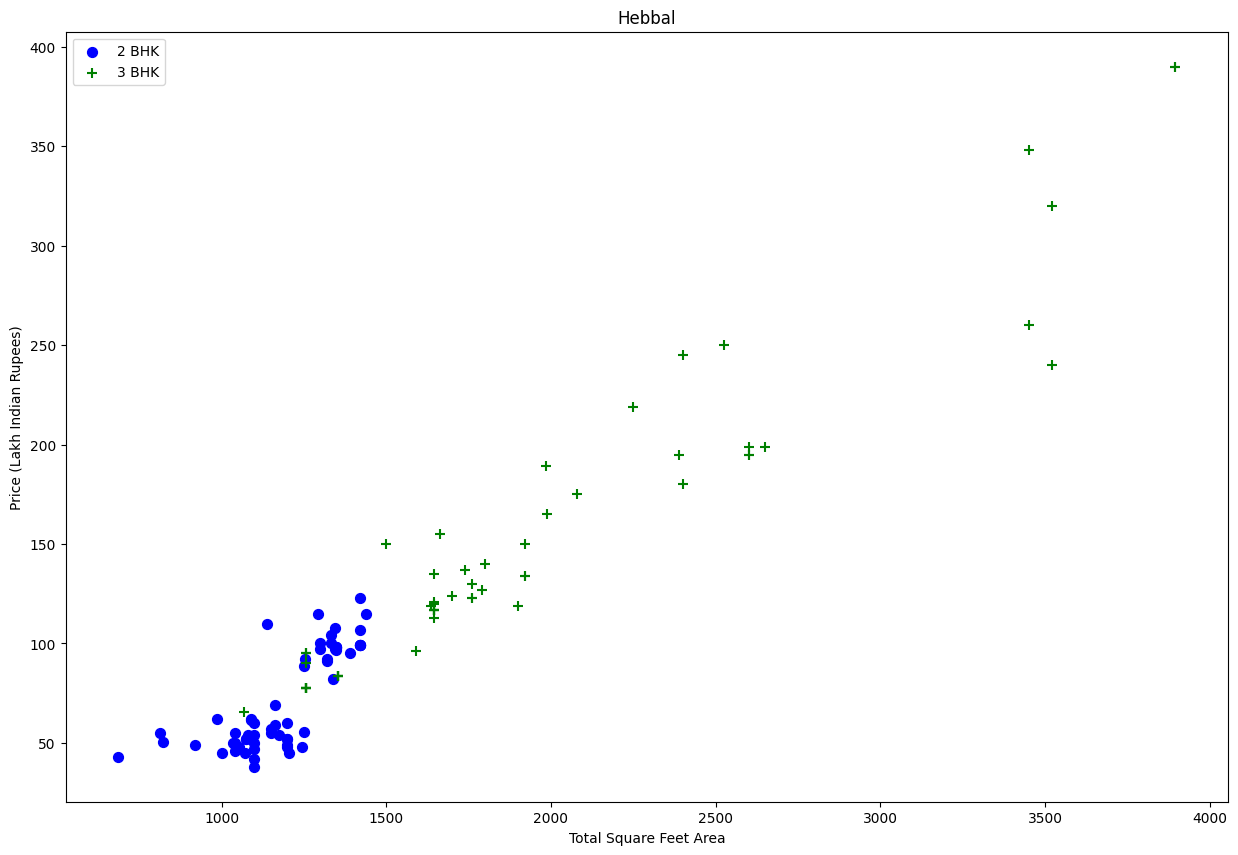

In [60]:
plot_scatter_chart(df_,"Hebbal")


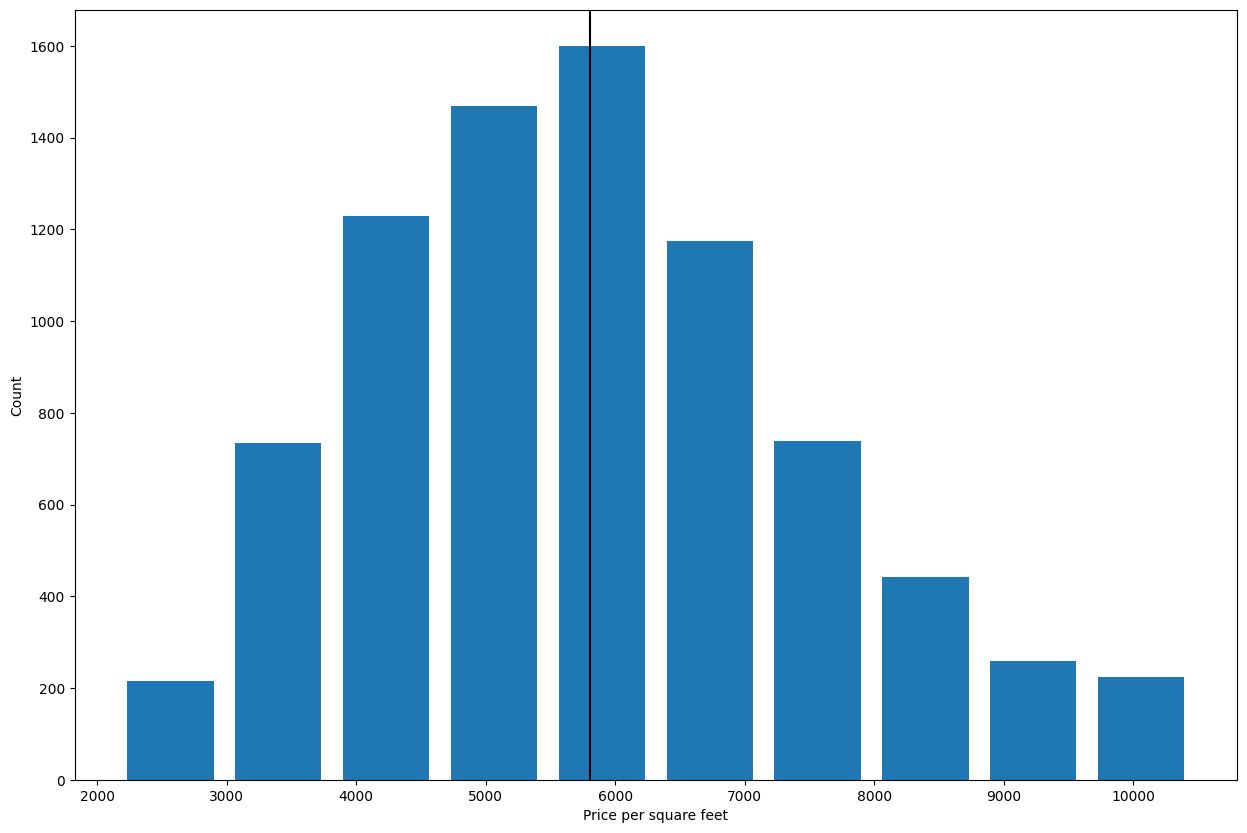

In [61]:
plt.hist(df_.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.axvline(df_.price_per_sqft.mean(),color='black')
plt.show()

## Outlier Removal Using Bathrooms Feature


In [62]:
df_.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,60.0,2,6000.00
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,115.0,3,6534.09
3,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.67
4,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.67
5,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.49


In [63]:
len(df_.bath.unique())
#df_.bath.nunique()

13

Text(0, 0.5, 'Count')

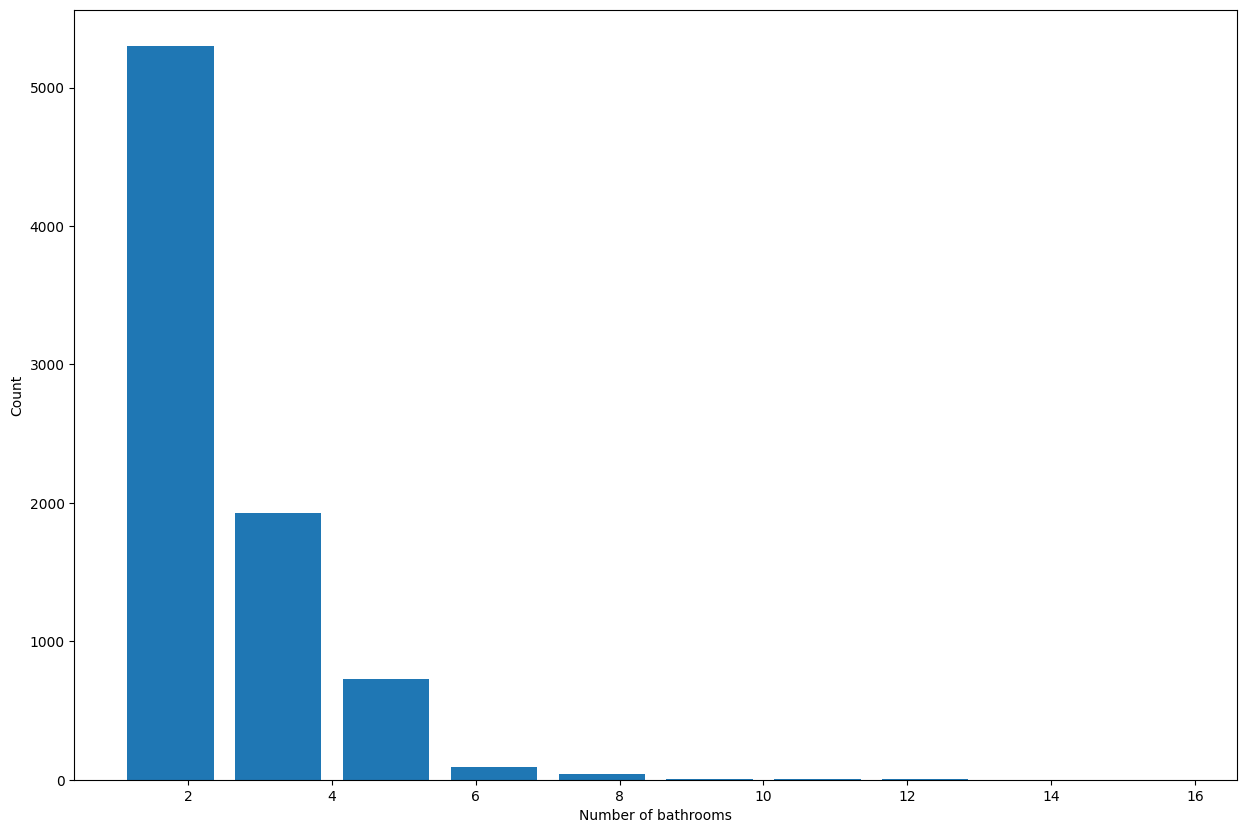

In [64]:
plt.hist(df_.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [65]:
df_.groupby('bath').agg('count')

,area_type,location,total_sqft,price,BHK,price_per_sqft
bath,,,,,,
1.0,628,628,628,628,628,628
2.0,4669,4669,4669,4669,4669,4669
3.0,1923,1923,1923,1923,1923,1923
4.0,543,543,543,543,543,543
5.0,182,182,182,182,182,182
6.0,89,89,89,89,89,89
7.0,24,24,24,24,24,24
8.0,15,15,15,15,15,15
9.0,7,7,7,7,7,7


In [66]:
df_[df_.bath>10]

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
6121,Super built-up Area,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
9695,Super built-up Area,other,12000.0,12.0,525.0,10,4375.00
9771,Super built-up Area,other,10000.0,16.0,550.0,16,5500.00
10441,Super built-up Area,other,6000.0,12.0,150.0,11,2500.00
10745,Super built-up Area,other,5425.0,13.0,275.0,13,5069.12


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [67]:
df_=df_[df_.bath<df_.BHK+2]
df_.shape

(8007, 7)

In [68]:
df_.drop(['price_per_sqft'],axis=1,inplace=True)
df_.head(5)

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,60.0,2
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,115.0,3
3,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3
4,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5
5,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3


## Use One Hot Encoding For Location


In [69]:
df_.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'price', 'BHK'], dtype='object')

In [70]:
df_.location.nunique()

240

In [71]:
dummies=pd.get_dummies(df_.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df_=pd.concat([df_,dummies.drop('other',axis=1)],axis=1)
df_.head()

,area_type,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,60.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,115.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
df_.drop(['location'],axis=1,inplace=True)

# BUILD THE MODEL

In [74]:
df_.shape

(8007, 244)

In [75]:
X=df_.drop(['price'],axis=1)
Y=df_.price

##### Some Encoding by maping
area_mapping = {  'Super built-up Area': 0,
      'Built-up  Area': 
       'Carpet  Area':
        'Plot  Area': 3
}

In [76]:
areas=X.area_type.unique()
areas

array(['Super built-up  Area', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'], dtype=object)

In [77]:
dict_area = {key:index for index , key in enumerate(areas , 0)}
dict_area

{'Super built-up  Area': 0,
 'Built-up  Area': 1,
 'Carpet  Area': 2,
 'Plot  Area': 3}

In [78]:
X.area_type=X['area_type'].map(dict_area)
X.area_type.unique()

array([0, 1, 2, 3], dtype=int64)

In [79]:
X.head()

,area_type,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,1000.0,3.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1760.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1875.0,3.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1500.0,5.0,5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,2065.0,4.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Train test Split 

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

## Linear Regression Model

In [81]:
from sklearn.linear_model import LinearRegression

In [105]:
pip install scikit-learn==1.3.2

In [106]:
lr=LinearRegression()

In [107]:
X.dtypes

area_type                int64
total_sqft             float64
bath                   float64
BHK                      int64
1st Block Jayanagar       bool
                        ...   
Yelachenahalli            bool
Yelahanka                 bool
Yelahanka New Town        bool
Yelenahalli               bool
Yeshwanthpur              bool
Length: 243, dtype: object

In [108]:
X.area_type.isnull().sum()

0

In [109]:
X.area_type.nunique()

4

In [110]:
X.groupby('area_type').agg('count')

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
area_type,,,,,,,,,,,,,,,,,,,,,
0,5827,5827,5827,5827,5827,5827,5827,5827,5827,5827,...,5827,5827,5827,5827,5827,5827,5827,5827,5827,5827
1,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,...,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478
2,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
3,642,642,642,642,642,642,642,642,642,642,...,642,642,642,642,642,642,642,642,642,642


In [111]:
lr.fit(X_train,Y_train)

LinearRegression()

In [112]:
lr.score(X_test,Y_test)

0.8409418703050731

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.81526329, 0.833732  , 0.84143763, 0.82957497, 0.86567509])

# FIND THE BEST MODEL USING GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [115]:
def find_best_model(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [116]:
find_best_model(X,Y)

C:\Users\aarsh\anaconda3\envs\tf-new\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aarsh\anaconda3\envs\tf-new\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aarsh\anaconda3\envs\tf-new\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\aarsh\anaconda3\envs\tf-new\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  F

,model,best_score,best_params
0,linear_regression,0.837137,{}
1,lasso,0.793382,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.786543,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## EXPORT THE TESTED MODEL TO A PICKLE FILE

In [117]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [119]:
import sklearn

In [120]:
sklearn.__version__

'1.3.2'

In [121]:
import sys 
import sys 
import platform 
print(platform. python_version())

3.10.13
